# How to read a Cloud-Optimised GeoTiff (COG) into xarray

This shows how you can load different resolution layers from a COG into Xarray.

In [1]:
import rioxarray 

cog_url = "https://dap.ceda.ac.uk/neodc/sentinel_ard/indices/sentinel_2/ndvi/2022/06/08/S2A_20220608_lat51lon364_T30UVB_ORB037_utm30n_osgb_NDVI.tif"

In [2]:
rds_lev_1 = rioxarray.open_rasterio(cog_url, masked=True, overview_level=1)
rds_lev_3 = rioxarray.open_rasterio(cog_url, masked=True, overview_level=3)

In [3]:
print(f"Shapes are different at different resolutions: {rds_lev_1.shape} != {rds_lev_3.shape}")

Shapes are different at different resolutions: (1, 2783, 2708) != (1, 696, 677)


In [4]:
rds = rds_lev_1
rds.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes: (12/18)
    crs_wkt:                           PROJCS["OSGB36 / British National Grid...
    semi_major_axis:                   6377563.396
    semi_minor_axis:                   6356256.909237285
    inverse_flattening:                299.3249646
    reference_ellipsoid_name:          Airy 1830
    longitude_of_prime_meridian:       0.0
    ...                                ...
    longitude_of_central_meridian:     -2.0
    false_easting:                     400000.0
    false_northing:                    -100000.0
    scale_factor_at_central_meridian:  0.9996012717
    spatial_ref:                       PROJCS["OSGB36 / British National Grid...
    GeoTransform:                      230560.0 40.0 0.0 174310.0 0.0 -39.996...

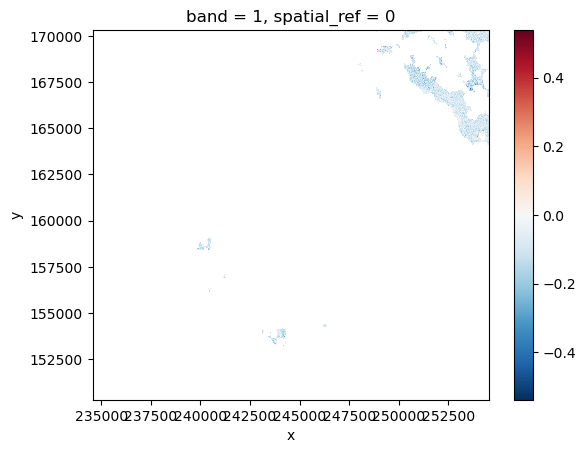

In [5]:
rds_lev_1.isel(x=slice(100, 600), y=slice(100, 600)).plot()

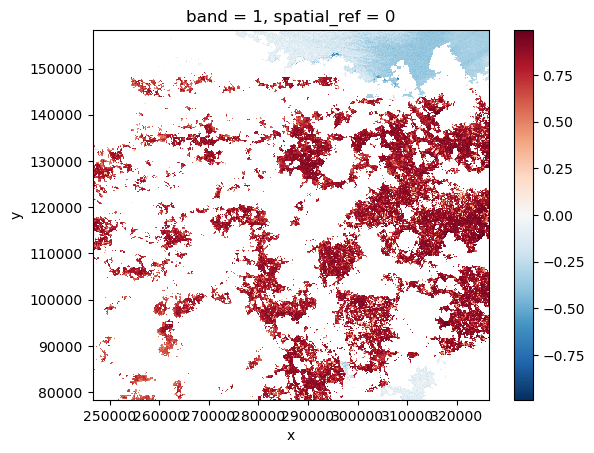

In [6]:
rds_lev_3.isel(x=slice(100, 600), y=slice(100, 600)).plot()